In [1]:
# import all required liabraries
import pandas as pd
import pingouin as pg
from pingouin import ttest
from scipy.stats import levene
from pandas import read_excel
import matplotlib.pyplot as plt
import seaborn as sns

#  1.For first data set 

In [2]:
# importing dataset
df=pd.read_excel('genderweight.xlsx')
df

,Females,Weight_females,Males,Weight_males
0,F,61.585869,M,89.737485
1,F,64.554858,M,86.301228
2,F,66.168882,M,86.576987
3,F,59.308605,M,91.527742
4,F,64.858249,M,85.184539
5,F,65.012112,M,81.034873
6,F,62.850520,M,92.161156
7,F,62.906736,M,83.369894
8,F,62.871096,M,88.916739
9,F,62.219924,M,83.852283


# Q.1 Shape of data 

In [3]:
df.shape

(20, 4)

# Q.2 Perform all assumptions required for relevent test

Here we have two samples of male and female mice so for this data we have two perform two sample t-test.

In [11]:
# Hyptothesis testing

Here in our question we have to find is there any difference in weights of female and male mice. Hence our null hypothesis is there is no difference in weight of female and male mice and alternate hypothesis says that there is a difference.

In [12]:
# normality testing

In [4]:
# female mice
print(pg.normality(df['Weight_females']))

                       W      pval  normal
Weight_females  0.938473  0.224329    True


Here p>0.05, so it is not significant. Hence df['Weight_females'] is normally distributed.

In [5]:
# male mice
print(pg.normality(df['Weight_males']))

                    W     pval  normal
Weight_males  0.98634  0.98856    True


Here p>0.05, so it is not significant. Hence df['Weight_males'] is normally distributed.

In [6]:
# Now we perform shapiro wilk test for normality.

In [7]:
# we import scipy library to perform shapiro wilk test to find normality 
import scipy
from scipy.stats import shapiro

In [8]:
# shapiro wilk test for df['Weight_females']
stat, p=shapiro(df['Weight_females'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p>0.05:
    print('sample are normally distributed')
else:
    print('sample does not normally distributed')

Statistics=0.938, p=0.224
sample are normally distributed


In [9]:
# shapiro wilk test for df['Weight_males']
stat, p=shapiro(df['Weight_males'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p>0.05:
    print('sample are normally distributed')
else:
    print('sample does not normally distributed')

Statistics=0.986, p=0.989
sample are normally distributed


In [7]:
#for more surity of normal distribution we perform qq-plot

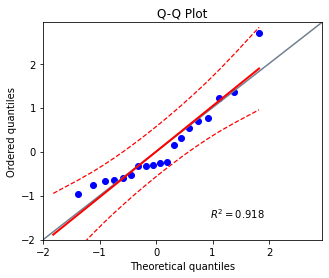

In [8]:
ax= pg.qqplot(df['Weight_females'],dist='norm')

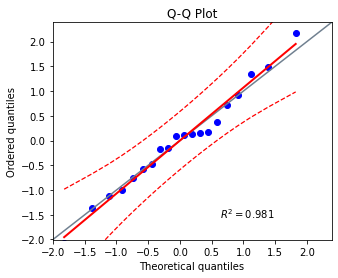

In [9]:
ax= pg.qqplot(df['Weight_males'],dist='norm')

Now from qq-plot we can surely say that our data is normally distributed.

# Q.3 Measure of central tendency and measure of dispersion of given data based on assumptions

Here our both datas of female mice and male mice are normally distributed, so we can calculate mean as measure of central tendency and standard deviation , variance as measure of dispersion.

In [10]:
df.mean()

Weight_females    63.498672
Weight_males      85.826115
dtype: float64

In [11]:
df.std()

Weight_females    2.027615
Weight_males      4.353520
dtype: float64

In [12]:
df.var()

Weight_females     4.111223
Weight_males      18.953139
dtype: float64

# Q.4 Create a box plot to campare male and female weight

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6747a2730>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6747a2df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6747a23d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6747aa4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6747aa850>],
 'means': []}

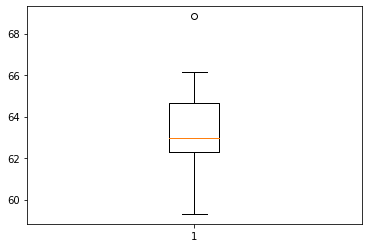

In [13]:
plt.boxplot(df['Weight_females'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6757bb640>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6757bbd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6757bb2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6757c6400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6757c6760>],
 'means': []}

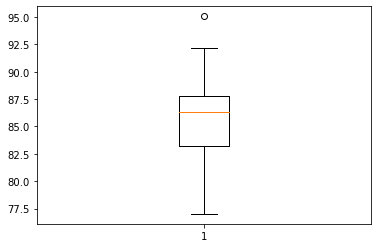

In [14]:
plt.boxplot(df['Weight_males'])

Now we plot boxplot of both female and males data in one graph for better to compare.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6747b5d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6757ec940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f67475fa60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6757f2790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6757f2af0>],
 'means': []}

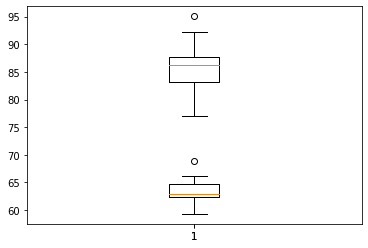

In [15]:
plt.boxplot(df['Weight_females'])
plt.boxplot(df['Weight_males'])

From above we can say that median value of male data is higher than female.

# Levens Test of Equality (Homogeneity) of variance

In [16]:
# Levene's test in python scipy
stat, p = levene(df['Weight_females'],df['Weight_males'])
print(stat,p)


6.116972600402776 0.01797467699989902


Here p<0.05 , so it is significant and their is significant difference in varience between both columns. Hence unequal varience assumed.

# Q.5 Two sample t-test

In [17]:
stats = ttest(df['Weight_females'],df['Weight_males'],correction='auto' )
stats

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-20.791378,38,two-sided,2.331459e-22,"[-24.5, -20.15]",6.574811,8.514e+18,1.0


Here our p<0.05 , so it is significant and we  reject null hypothesis

# 2.For second dataset

In [18]:
# importing dataset
df=pd.read_csv('mtcars (1).csv')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Q1 for normality

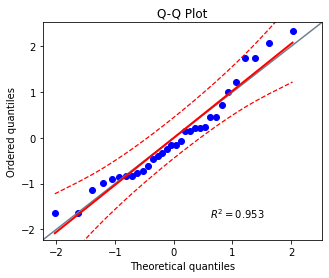

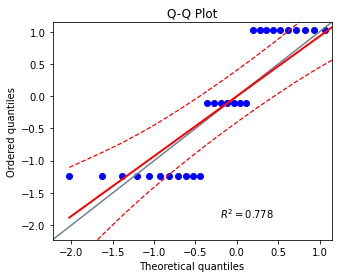

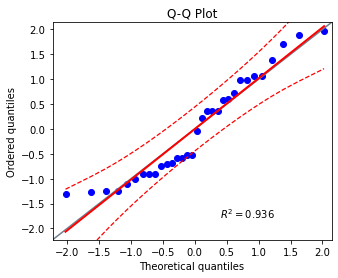

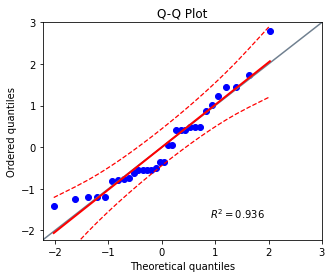

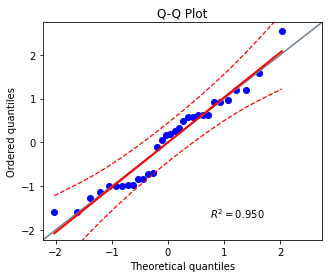

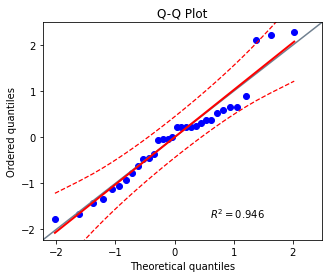

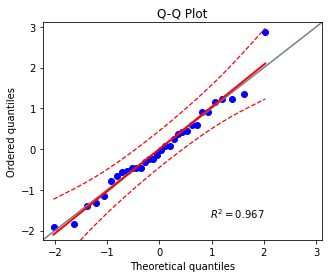

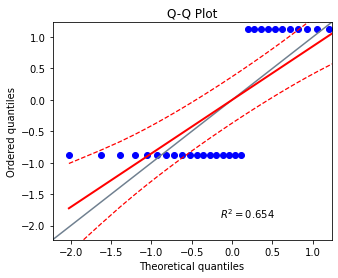

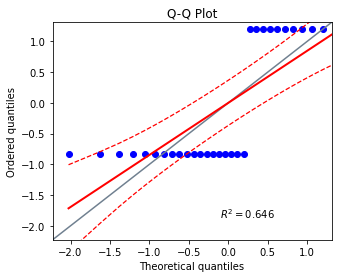

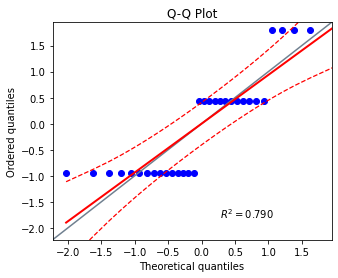

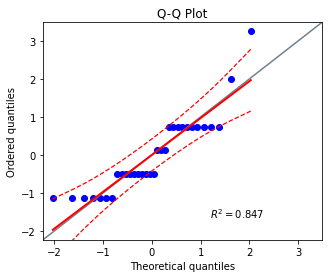

In [19]:
ax= pg.qqplot(df['mpg'],dist='norm')
ax= pg.qqplot(df['cyl'],dist='norm')
ax= pg.qqplot(df['disp'],dist='norm')
ax= pg.qqplot(df['hp'],dist='norm')
ax= pg.qqplot(df['drat'],dist='norm')
ax= pg.qqplot(df['wt'],dist='norm')
ax= pg.qqplot(df['qsec'],dist='norm')
ax= pg.qqplot(df['vs'],dist='norm')
ax= pg.qqplot(df['am'],dist='norm')
ax= pg.qqplot(df['gear'],dist='norm')
ax= pg.qqplot(df['carb'],dist='norm')

# Q.2 Please check the normality of each column and explain which columns are not normally distributed.

In [21]:
print(pg.normality(df['mpg']))

            W      pval  normal
mpg  0.947565  0.122881    True


In [22]:
print(pg.normality(df['cyl']))

           W      pval  normal
cyl  0.75331  0.000006   False


In [23]:
print(pg.normality(df['disp']))

             W      pval  normal
disp  0.920013  0.020806   False


In [24]:
print(pg.normality(df['hp']))

           W      pval  normal
hp  0.933419  0.048807   False


In [25]:
print(pg.normality(df['drat']))

             W     pval  normal
drat  0.945884  0.11006    True


In [26]:
print(pg.normality(df['wt']))

           W      pval  normal
wt  0.943258  0.092656    True


In [27]:
print(pg.normality(df['qsec']))

             W      pval  normal
qsec  0.973251  0.593525    True


In [32]:
print(pg.normality(df['vs']))

           W          pval  normal
vs  0.632264  9.737415e-08   False


In [29]:
print(pg.normality(df['am']))

           W          pval  normal
am  0.625074  7.836341e-08   False


In [30]:
print(pg.normality(df['gear']))

             W      pval  normal
gear  0.772786  0.000013   False


In [31]:
print(pg.normality(df['carb']))

             W      pval  normal
carb  0.851097  0.000438   False


 The columns which are  normally distributed  - mpg,drat,wt,qsec.

 The columns which are not normally distributed are- disp, cyl,hp,vs,am,gear,carb.

# Q.3 Please calculate mean and meadian values of each relevent column. Do you see the difference between mean and median?

In [33]:
df.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [35]:
df.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

Here we can see difference between mean and median of relevent column. The columns which are normally distributed, difference between mean and median of that columns are pretty less as compare to the columns which not normally distributed.

# Q.4 Which variables are colinear?

In [38]:
df.corr()*100

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,100.000000,-85.216196,-84.755138,-77.616837,68.117191,-86.765938,41.868403,66.403892,59.983243,48.028476,-55.092507
cyl,-85.216196,100.000000,90.203287,83.244745,-69.993811,78.249579,-59.124207,-81.081180,-52.260705,-49.268660,52.698829
disp,-84.755138,90.203287,100.000000,79.094859,-71.021393,88.797992,-43.369788,-71.041589,-59.122704,-55.556920,39.497686
hp,-77.616837,83.244745,79.094859,100.000000,-44.875912,65.874789,-70.822339,-72.309674,-24.320426,-12.570426,74.981247
drat,68.117191,-69.993811,-71.021393,-44.875912,100.000000,-71.244065,9.120476,44.027846,71.271113,69.961013,-9.078980
wt,-86.765938,78.249579,88.797992,65.874789,-71.244065,100.000000,-17.471588,-55.491568,-69.249526,-58.328700,42.760594
qsec,41.868403,-59.124207,-43.369788,-70.822339,9.120476,-17.471588,100.000000,74.453544,-22.986086,-21.268223,-65.624923
vs,66.403892,-81.081180,-71.041589,-72.309674,44.027846,-55.491568,74.453544,100.000000,16.834512,20.602335,-56.960714
am,59.983243,-52.260705,-59.122704,-24.320426,71.271113,-69.249526,-22.986086,16.834512,100.000000,79.405876,5.753435
gear,48.028476,-49.268660,-55.556920,-12.570426,69.961013,-58.328700,-21.268223,20.602335,79.405876,100.000000,27.407284


<AxesSubplot:>

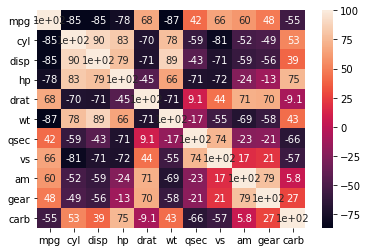

In [39]:
sns.heatmap(df.corr()*100,annot=True)

Here we can see correlation of variables.